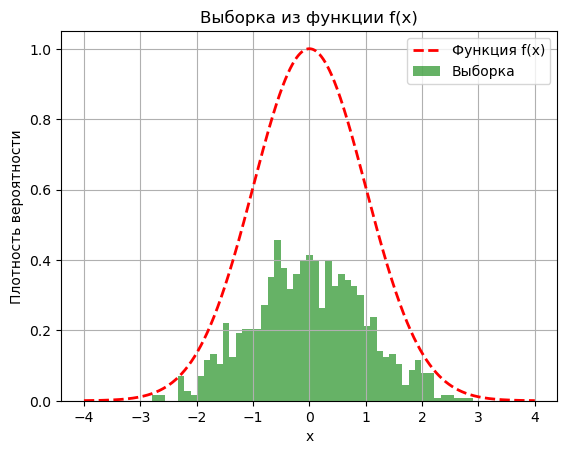

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2 / 2)

def metropolis_sampler(num_samples, num_steps, proposal_std):
    samples = []
    current_x = 0.0
    

    for _ in range(num_samples):
        accepted_samples = 0
        for _ in range(num_steps):
            # Генерируем новое предложенное значение
            
            proposed_x = np.random.normal(current_x, proposal_std)
            # Вычисляем отношение alpha
            alpha = f(proposed_x) / f(current_x)
            # Принимаем или отвергаем новое значение
            if np.random.uniform(0, 1) < min(1, alpha):
                current_x = proposed_x
                accepted_samples += 1
        samples.append(current_x)
    
    return np.array(samples)

# Параметры
num_samples = 1000
num_steps = 500
proposal_std = 0.8

# Генерация выборки
samples = metropolis_sampler(num_samples, num_steps, proposal_std)

# Визуализация результатов
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 4, 1000)
plt.plot(x, f(x), 'r--', linewidth=2)
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.title('Выборка из функции f(x)')
plt.legend(['Функция f(x)', 'Выборка'])
plt.grid(True)
plt.show()


In [20]:
!pip install SALib


Defaulting to user installation because normal site-packages is not writeable


In [11]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

# Определение функции
def my_function(x):
    return 1e-4 * np.sin(x[:, 0] + x[:, 1]) + x[:, 2]

# Определение диапазонов значений параметров
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-np.pi, np.pi], [-np.pi, np.pi], [-5, 5]]
}

# Генерация входных данных методом Saltelli
param_values = saltelli.sample(problem, 1000)

# Вычисление значений функции
Y = my_function(param_values)

# Рассчет показателей чувствительности методом Sobol
Si = sobol.analyze(problem, Y, print_to_console=True)

# Вывод результатов
print(Si)



              ST       ST_conf
x1  5.983131e-10  3.855804e-11
x2  6.026217e-10  4.592045e-11
x3  9.960246e-01  5.776512e-02
              S1   S1_conf
x1  7.911591e-08  0.000002
x2  1.742150e-08  0.000003
x3  9.961158e-01  0.077475
                    S2   S2_conf
(x1, x2) -3.501192e-08  0.000003
(x1, x3) -4.026857e-08  0.000003
(x2, x3)  8.312507e-08  0.000004
{'S1': array([7.91159069e-08, 1.74214974e-08, 9.96115802e-01]), 'S1_conf': array([2.29883719e-06, 2.51928764e-06, 7.74754382e-02]), 'ST': array([5.98313062e-10, 6.02621698e-10, 9.96024627e-01]), 'ST_conf': array([3.85580432e-11, 4.59204475e-11, 5.77651182e-02]), 'S2': array([[            nan, -3.50119198e-08, -4.02685736e-08],
       [            nan,             nan,  8.31250719e-08],
       [            nan,             nan,             nan]]), 'S2_conf': array([[           nan, 2.78624527e-06, 3.02920755e-06],
       [           nan,            nan, 3.56577837e-06],
       [           nan,            nan,            nan]])}


/tmp/ipykernel_82768/2469543034.py:17: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/home/vbva/.local/lib/python3.10/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
